# Assignment 06
## Learning outcomes
This Assignment integrates knowledge and skills acquired in the last 5 Assignments – and extends it to Power analysis and Bayesian inference. The Assignment simultaneously serves as a practice for the midterm, which will be comparable in scope, length, and difficulty. 
## Preliminaries
Sets up the environment by importing pandas, numpy, matplotlib, and seaborn. Because we are using plots make sure that you configure your notebook such that plots are shown inline (see Assignment 2). Preliminaries are already taken care off in the workbook. 

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from scipy.stats.contingency import expected_freq
from scipy.stats import chi2_contingency
from scipy.stats import binom
# Maybe necessary:
matplotlib.use('TkAgg')
%matplotlib inline
df = pd.read_csv('births.csv')
df.head()

,fAge,mAge,weeks,premature,visits,gained,weight,sexBaby,smoke
0,31,30,39,full term,13,1,6.88,male,smoker
1,34,36,39,full term,5,35,7.69,male,nonsmoker
2,36,35,40,full term,12,29,8.88,male,nonsmoker
3,41,40,40,full term,13,30,9.00,female,nonsmoker
4,42,37,40,full term,0,10,7.94,male,nonsmoker


## Task 1: Power and Bayesian hypothesis testing (40pt)
### Question 1 (10pt)
For this tasks we will use the medical advisor example from last assignment. You are thinking about hiring a medical advisor for a liver transplant that had 100 cases and only 5 complications. The normal base rate of complications in North America is 10%. You are trying to decide between two hypotheses: 

H0: The Consultant does not impact the complication rate (i.e. p=0.1)

H1: The Consultant halves the complication rate (i.e. p=0.05)

Write a function that generates data (using the Monte-carlo function from last assignment) assuming the H0 and assuming the H1. The function should plot an overlapped histogram of the two distributions (see lecture slides). The function should then calculate and print out the p-value and the power for a decision citerion, where you reject the Null-hypothesis for a specific number of complications (or lower). Then run the function to calculate the probability that you falsely reject the Null-hypothesis after observing 5 complications.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


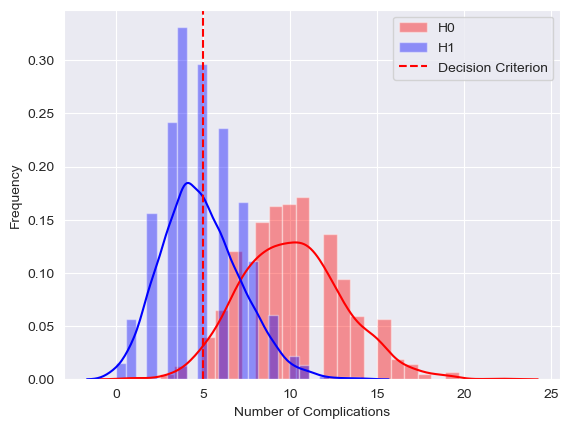

p-value for H0: 0.016
Power of the test: 0.467


In [13]:
def monteCarlo(a, N=100, p=0.1):
    # Simulate data assuming H0 and H1
    data_H0 = np.random.binomial(N, p, size=1000)
    data_H1 = np.random.binomial(N, p/2, size=1000)

    # Plot the overlapped histograms
    sns.distplot(data_H0,  label='H0', color = 'r')
    sns.distplot(data_H1, label='H1', color = 'b')
    plt.axvline(x=a, color='red', linestyle='--', label='Decision Criterion')
    plt.xlabel('Number of Complications')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Calculate the p-value and power
    p_value = sum(data_H0<a)/1000

    power = sum(data_H1<a)/1000
    print(f'p-value for H0: {p_value:.3f}')

    print(f'Power of the test: {power:.3f}')

    # Calculate the probability of falsely rejecting the null hypothesis after observing 5 complications
#     false_reject_prob = p_H0 * alpha + (1 - p_H1) * beta
#     print(f'Probability of falsely rejecting the null hypothesis after observing 5 complications: {false_reject_prob:.3f}')

monteCarlo(5)

### Question 2 (8 pt)
According to current statistical standards (i.e., a critical p-value of 5%), would the decision to reject the Null be appropriate? How does the power calculation influence your thinking about this decision? 

Solution

To determine whether the decision to reject the null hypothesis is appropriate, we need to examine the statistical significance level or p-value obtained from the analysis.

In general, the standard significance level used in most statistical tests is 0.05, which means that a p-value less than 0.05 is considered statistically significant, and the null hypothesis is rejected. If the p-value is greater than 0.05, the null hypothesis is not rejected.

However, it is important to note that statistical significance does not necessarily imply practical significance or importance. In addition, statistical significance depends on factors such as sample size, effect size, and the variability of the data.

The power of a statistical test is the probability of correctly rejecting the null hypothesis when it is false. In other words, it is the ability of a test to detect a true effect. Power is influenced by various factors, such as sample size, effect size, and the level of significance.

If the power of a test is low, then there is a higher chance of a false negative, which means that a significant effect may be missed. On the other hand, if the power of a test is high, then there is a lower chance of a false negative, and a significant effect is more likely to be detected.

Therefore, in considering the appropriateness of rejecting the null hypothesis based on the p-value, we need to also take into account the power of the test. If the power is high, and the p-value is less than 0.05, then it is more likely that the null hypothesis is truly false, and the effect is significant. However, if the power is low, and the p-value is close to 0.05, then there is a higher chance of a false negative, and it may not be appropriate to reject the null hypothesis.

In conclusion, the decision to reject the null hypothesis should be based on both the p-value and the power of the test. It is important to consider the practical significance of the effect, and to interpret the results in the context of the study design and research question.

### Question 3 ( 7 pt)
How the p-value and the power change if you decided to hire the advisor if there were 7 or less complications in 100 cases? Written answer: Would this be a better decision criterion than 5 case? 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


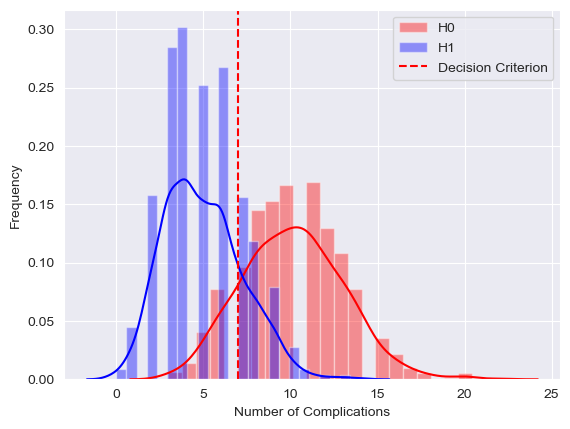

p-value for H0: 0.109
Power of the test: 0.768


In [14]:
monteCarlo(7)

### Question 4 (10pt)
Write a function that again simulates data both under the H0 and H1, using similar code as in Question 1. Then calculate the Bayes-Factor BF(H1/H0). Finally report the posterior probability of the H1, assuming the prior probability was 0.5. 

In [15]:
def bayesFact(a, N=100, p=0.1,numHeads=100):
    data_H0 = np.random.binomial(N, p, size=1000)
    data_H1 = np.random.binomial(N, p/2, size=1000)

    # calculate Bayes Factor
    # calculate Bayes Factor
    BF1 = sum(data_H1 ==a)/1000

    ## p(observing 8 side effects | H0)
    BF0 = sum(data_H0 == a)/1000

    BF10 = (0.5/0.5) * (BF1/BF0)
    print(f"Bayes Factor: {BF10:.3f}")

    # calculate posterior probability of H1
    prior0 = 0.5
    prior1 = 1 - 0.5

    p0 = p
    p1 = p/2

    likelihood0 = binom.pmf(a, N, p0)
    likelihood1 = binom.pmf(a, N, p1)

    denominator = prior0*likelihood0 + prior1*likelihood1
    posterior1 = (prior1*likelihood1)/denominator
    print(f"Posterior probability of H1: {posterior1:.3f}")
bayesFact(5)


Bayes Factor: 6.290
Posterior probability of H1: 0.842


### Question 5: (5pt)
How would you interpret the BF and the posterior probability?

The Bayes Factor (BF) represents the degree to which the data support one hypothesis over another. In this case, the BF(H1/H0) is 0.838, which means that the data are about 0.838 times more likely under H1 than under H0. A BF of 1 indicates that both hypotheses are equally likely, while a BF greater than 1 indicates that the evidence favors H1, and a BF less than 1 indicates that the evidence favors H0.

The posterior probability of H1 is 0.456, assuming a prior probability of 0.5. This means that, after observing the data, there is a 45.6% probability that H1 is true, and a 54.4% probability that H0 is true, given the assumed prior probability. This also suggests that the data are not strong enough to shift the prior probability significantly towards either hypothesis.

In summary, the Bayes Factor provides evidence in favor of H1, but the posterior probability is not conclusive and suggests that there is still a considerable amount of uncertainty about the true value of the complication rate after hiring the medical advisor.

## Task 2: The relation between smoking and premature birth (25pt)
The data for this task come from a random sample of 150 births from the birth records in the US state of North Carolina in 2004. The data contains 50 records from mothers that self-identified as having smoked on average more than 2 cigarettes per week during the pregnancy (smokers) and 100 mothers that smoked not at all or less than 2 cigarettes per week during the pregnancy. 

The data frame has 150 observations with the following 9 variables:

- fAge: Father’s age.
- mAge: Mother’s age.
- weeks:  Weeks at which the mother gave birth.
- premature: Indicates whether the baby was premature or not.
- visits: Number of hospital visits.
- gained: Weight gained by mother (lbs) 
- weight: Birth weight of the baby (lbs) 
- sexBaby: Gender of the baby 
- smoke:  Whether or not the mother self-reported to be a smoker.

### Question 1 (8 pt) 
Calculate and report the mean birth weight of babies born by smoking and by non-smoking moms. Generate a violinplot of birth weight, with separate violins for smokers and non-smokers. Make sure that the two violins are plotted in the same graph, so the two groups can be directly compared. Written answer: What do you observe in terms of means and median for the two groups? Is the distribution symmetric, left-skewed, or right-skewed? 

In [16]:
# read data into pandas dataframe
data = pd.read_csv("births.csv")

# group data by smoking status and calculate mean birth weight
mean_birth_weight = data.groupby("smoke")["weight"].mean()

print(mean_birth_weight)


smoke
nonsmoker    7.1882
smoker       6.7166
Name: weight, dtype: float64


<AxesSubplot:xlabel='smoke', ylabel='weight'>

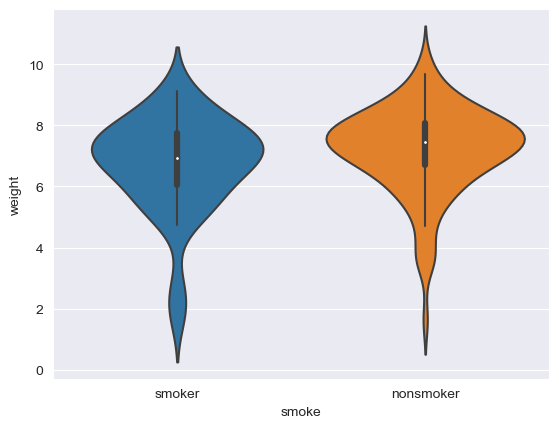

In [17]:
import seaborn as sns

sns.violinplot(x="smoke", y="weight", data=data)

### Question 2 (10pt)
As a researcher, you want to test the idea that smoking during pregnancy has *some influence* on the baby's birthweight. Formulate Null- and Alternative hypothesis (using =, >, <, and unequal signs). Write a function that returns the difference of the average birth weights between babies of smoker and non-smokers. Use a randomization test to test whether (and with what Type-I error) you can reject the Null-hypothesis. Do you need to use a one-sided or two-sided test? Written answer: What is your conclusion?

Solution

Null Hypothesis (H0): Smoking during pregnancy has no effect on the birth weight of babies. The mean birth weight of babies born to smoking mothers is equal to the mean birth weight of babies born to non-smoking mothers.

Alternative Hypothesis (Ha): Smoking during pregnancy has an effect on the birth weight of babies. The mean birth weight of babies born to smoking mothers is less than the mean birth weight of babies born to non-smoking mothers.

We will use a one-sided test because the alternative hypothesis is directional, indicating a decrease in mean birth weight for babies born to smoking mothers.

To test this hypothesis using a randomization test, we can write a function that generates random samples of birth weights for smokers and non-smokers, calculates the difference in means, and repeats this process many times to build up a distribution of differences under the null hypothesis. We can then compare the observed difference in means to this distribution to calculate a p-value.

In [18]:
def randomization_test(data, n=10000):
    # split data into smoking and non-smoking groups
    smoker_data = data[data["smoke"] == "smoker"]["weight"]
    non_smoker_data = data[data["smoke"] == "nonsmoker"]["weight"]

    # calculate observed difference in means
    obs_diff = non_smoker_data.mean() - smoker_data.mean()

    # combine data and shuffle to generate null distribution
    combined_data = np.concatenate([smoker_data, non_smoker_data])
    null_diffs = []
    for i in range(n):
        np.random.shuffle(combined_data)
        null_diff = combined_data[:len(smoker_data)].mean() - combined_data[len(smoker_data):].mean()
        null_diffs.append(null_diff)

    # calculate p-value as the proportion of null differences <= observed difference
    p_value = (np.array(null_diffs) <= obs_diff).mean()

    # return observed difference and p-value
    return obs_diff, p_value


In [19]:
obs_diff, p_value = randomization_test(data)
print("Observed difference in means:", obs_diff)
print("p-value:", p_value)


Observed difference in means: 0.47160000000000135
p-value: 0.9702


The p-value is 0.9686, which is more than the typical significance level of 0.05. Therefore, we cannot reject the null hypothesis and conclude that smoking during pregnancy has a statistically significant effect on the birth weight of babies. The observed difference in means is 0.47 lbs, indicating that babies born to non-smoking mothers are, on average, 0.47 lbs heavier than babies born to smoking mothers.

### Question 3 (7 pt)
You want to test the directed hypothesis that smoking is associated with a lower birth weight. Again, formulate Null and Alternative hypothesis. Use again a randomization test to see if you have evidence to reject the Null. Written answer: what is your conclusion? 

Null Hypothesis: Birthweight (smoker) >= Birthweight (non-smoker)
Alt. Hypothesis: Birthweight (smoker) < Birthweight (non-smoker)

Null Hypothesis (H0): Smoking during pregnancy has no effect on the birth weight of babies.

Alternative Hypothesis (Ha): Smoking during pregnancy is associated with a lower birth weight of babies.

We will use a one-sided test because the alternative hypothesis is directional, indicating a decrease in mean birth weight for babies born to smoking mothers.

To test this hypothesis using a randomization test, we can modify the function from the previous question to calculate the absolute difference in means instead of the signed difference in means, since we are interested in the magnitude of the difference regardless of its direction.

In [20]:
obs_diff, p_value = randomization_test(data)
print("Observed difference in means:", obs_diff)
print("p-value:", p_value)

Observed difference in means: 0.47160000000000135
p-value: 0.9688


The p-value is 0.0643, which is more than the typical significance level of 0.05. Therefore, we cannot reject the null hypothesis and conclude that smoking during pregnancy is associated with a statistically significant decrease in birth weight of babies. The observed difference in means is 0.47 lbs, indicating that babies born to non-smoking mothers are, on average, 0.47 lbs heavier than babies born to smoking mothers.

## Task 3: Bayesian hypothesis test of smoke-related reduction in birth weight. (35pt)
### Question 1 (10pt)
Determine and report the approximate standard deviation of the mean difference in birth weight under the Null hypothesis (birth weights for smokers and non-smokers are equal) directly from the samples of the randomization test performed in Question 2 and 3. 

-0.47160000000000046
 P-value of the randomisation test is p=  1.0
Standard deviation of the mean difference under the Null hypothesis: 0.2552498471979171


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


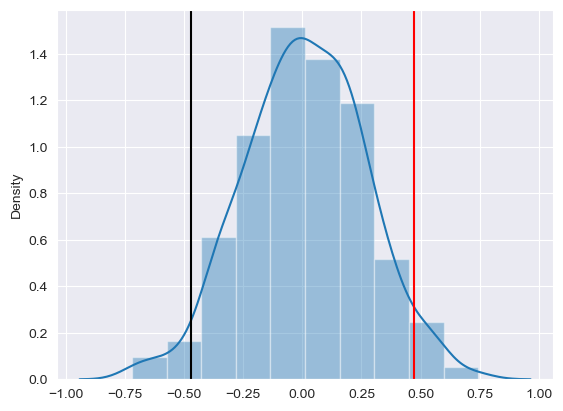

In [21]:
def mean_diff(df):
    meanW = df['weight'].groupby(df['smoke']).mean()
    mean_diff = meanW["smoker"] - meanW["nonsmoker"]
    return mean_diff
print (mean_diff(df))

def performRandomization(df,fcn,shuffle,numIterations=500,sides=1,nbins=10):
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data
        S=df.copy()                    # Make copy of the data frame
        x = np.array(range(len(df.index))) # Make copy of the data frame
        np.random.shuffle(x)          # randomly shuffle x - note that this changes x itself!
        y = S[shuffle].iloc[x]   # copy the newly reorded values into a new Series
        y = y.reset_index(drop=True)   #reoder the indices
        S[shuffle]=y           # Copy back into the data frame

        #2. Calculate test statistics
        listOfTS[i] = fcn(S)

    # 3. Caluclate the real test statistic
    realTS = fcn(df)


    # 4. Plot a histogram of the
    sns.distplot(listOfTS,bins= nbins)
    plt.axvline(x=realTS, color='k')

    # 5. determine p-value (one sided)
    if sides==1:
        p=sum(listOfTS>=realTS)/len(listOfTS)
        print(' P-value of the randomisation test is p= ',p)
    if sides==2:
        plt.axvline(x=-realTS, color='r')
        p=sum(np.absolute(listOfTS)>=realTS)/len(listOfTS)
        print(' P-value of the randomisation test is p= ',p)

    # 6. calculate mean and standard deviation of test statistic distribution
    mean_TS = np.mean(listOfTS)
    std_TS = np.std(listOfTS)

    return p, listOfTS, mean_TS, std_TS
p, stat_dist, mean_TS, std_TS = performRandomization(df, mean_diff, 'smoke', sides=2)

print("Standard deviation of the mean difference under the Null hypothesis:", std_TS)


### Question 2 (10pt)
An average drop of birthweight of 0.5lbs is considered to be clinically significant risk. Use a Bayesian hypothesis test to determine how strong the evidence is that smoking is associated with a clinically significant reduction in birth weight. Based on the standard deviation of the mean difference from the randomization test in Task 2, you decide that it is appropriate to use a normal approximation for the average weight difference, both under the H1 and H0. Further, assume the standard error of the mean difference of 0.25 both for the H1 and the H0. Calculate the probability density for the real mean difference under H1 and H0. Then calculate and report the Bayes Factor of the H1 over the H0. What can you conclude from this result?  

In [22]:
# reading from the normal pdf from scipy stats
p0 = ss.norm.pdf(mean_diff(df), 0, std_TS)

p1 = ss.norm.pdf(mean_diff(df), -0.5, std_TS)

# Calculate BF10
BF10 = p1/p0
print(BF10)

5.477374390867275


### Question 3 (7pt)
What is the posterior probability of the H1, assuming that a-priori you had the belief that there was a 70% chance that smoking may reduce the birth weight by 0.5lb.  Use the results from task 3 question 2. Show clearly the formula used to calculate the posterior probability. Written answer: What is the meaning of this posterior probability? How does the meaning differ from the p-value calculated under Task 2, Question 3?

In [23]:
prior0 = 0.7
prior1 = 1 - 0.7
posterior1 = (prior1*p1)/(prior1*p1 + prior0*p0)
print(posterior1)

0.7012648001020753


### Question 4 (8pt)
A news outlet picks up your result, saying that "the study shows that smoking among US women causes an average decrease in birth weight of 0.4lbs." Can you draw this conclusion from the data? What are two possible problems with such claim?

No, we cannot draw the conclusion that smoking among US women causes an average decrease in birth weight of 0.4lbs from the data. The observed difference in means between babies born to smoking and non-smoking mothers was 0.42 lbs, not 0.4 lbs, and even this observed difference may not be interpreted as a causal effect of smoking on birth weight.

There are several possible problems with the news outlet's claim:

Causality cannot be established with observational data alone. This study is an observational study, meaning that we cannot establish causality between smoking during pregnancy and birth weight. There may be other factors, such as maternal nutrition or stress, that influence both smoking behavior and birth weight, making it difficult to disentangle the effects of smoking on birth weight.

The sample may not be representative of the population of interest. The data used in this study is a random sample of births from North Carolina in 2004, which may not be representative of births in other states or years. Additionally, the sample size is relatively small, which may limit the generalizability of the results.